In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
df = pd.read_csv('train.csv')

In [3]:
# Inspecting first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Inspecting the data size
df.shape

(550068, 12)

In [5]:
# Checking for the null value
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
# Filling the null value with maximum value od index
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.value_counts().idxmax())

In [7]:
# Filling the null value with maximum value od index
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.value_counts().idxmax())

In [8]:
# Checking for the null value
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(0, 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(1, 'Married')

In [10]:
# Inspecting first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,8.0,16.0,7969


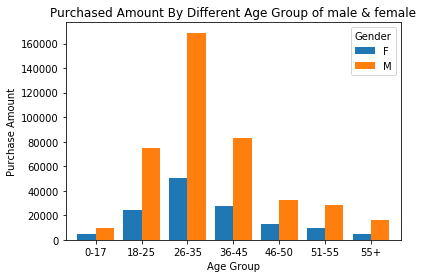

In [11]:
df.groupby(['Age', 'Gender'])['Purchase'].count().unstack().plot(kind='bar', width=0.8)
plt.xticks(rotation=360)
plt.ylabel('Purchase Amount')
plt.xlabel('Age Group')
plt.title('Purchased Amount By Different Age Group of male & female');

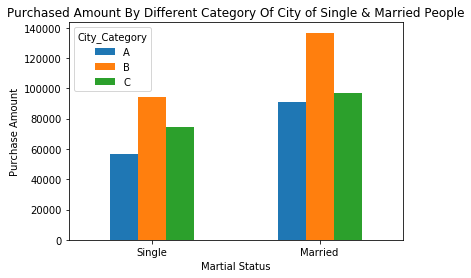

In [12]:
df.groupby(['Marital_Status', 'City_Category'])['Purchase'].count().unstack().plot(kind='bar')
plt.xticks([0, 1], ['Single', 'Married'], rotation=360)
plt.ylabel('Purchase Amount')
plt.xlabel('Martial Status')
plt.title('Purchased Amount By Different Category Of City of Single & Married People');

C:\Users\oneaf\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


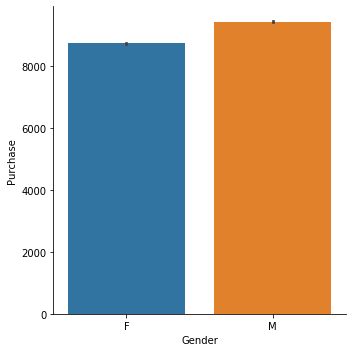

In [13]:
sns.factorplot(x='Gender', y='Purchase', data=df, kind='bar')

In [14]:
def make_distribution(parameter):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.boxplot(x=parameter, y = 'Purchase', data=df, hue='Gender', ax = ax)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Purchased Amount')
    plt.xlabel(parameter)
    plt.title('Distribution of Purchased Item for ' + parameter + ' by Gender')

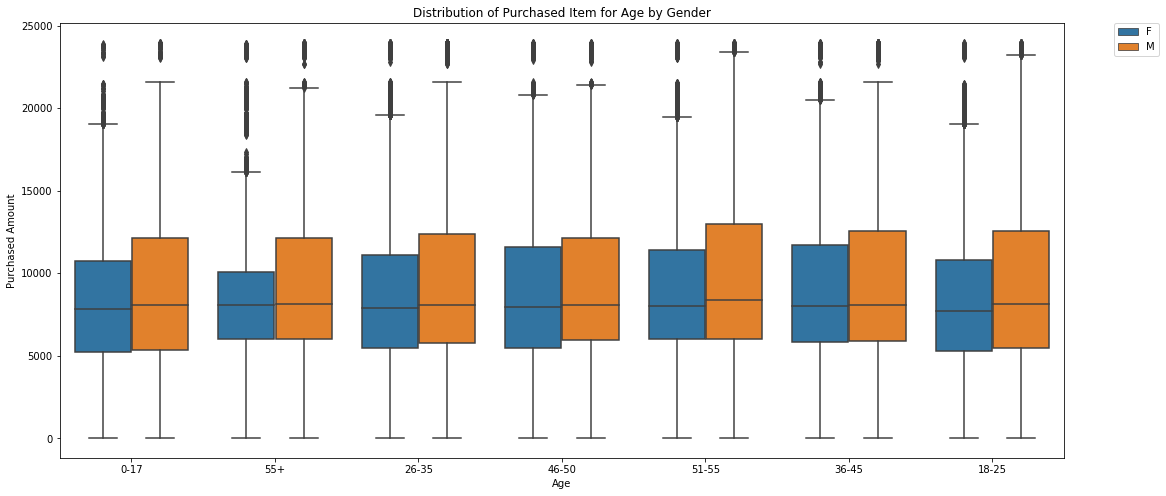

In [15]:
make_distribution('Age')

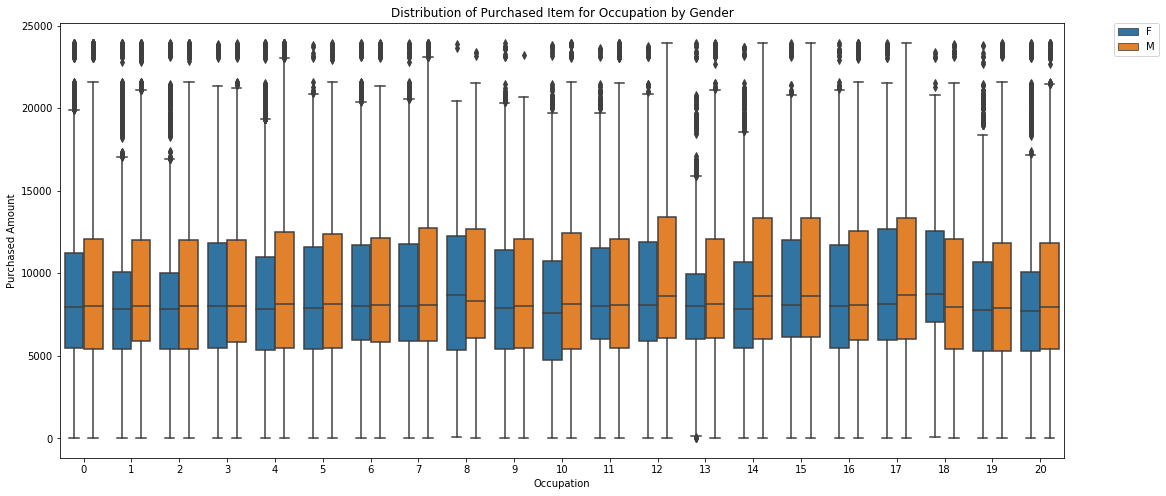

In [16]:
make_distribution('Occupation')

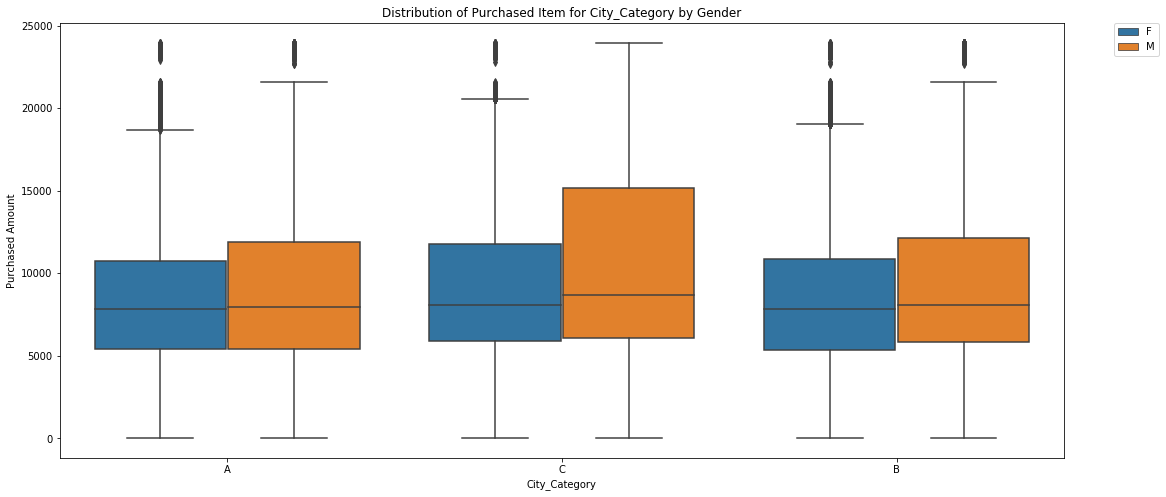

In [17]:
make_distribution('City_Category')

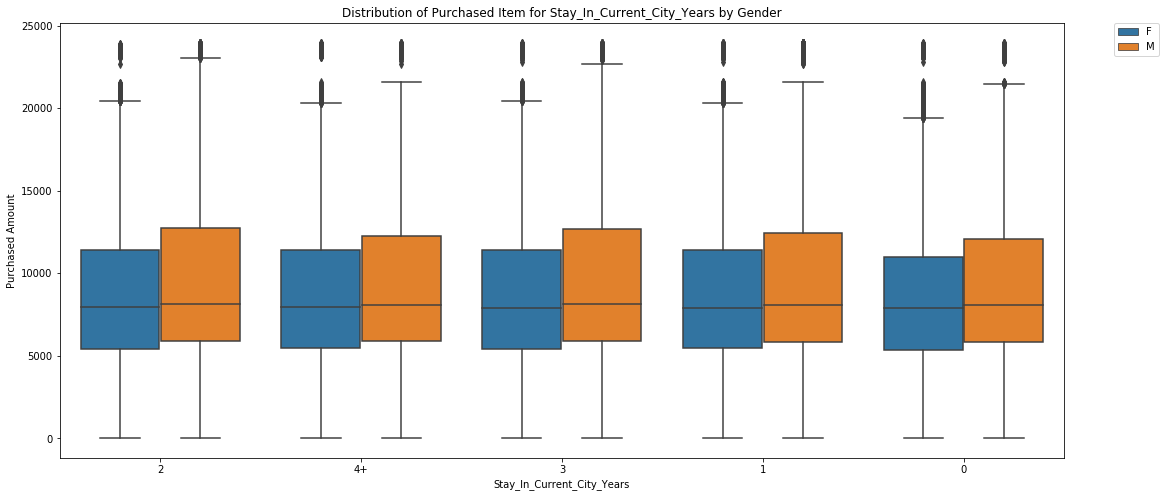

In [18]:
make_distribution('Stay_In_Current_City_Years')

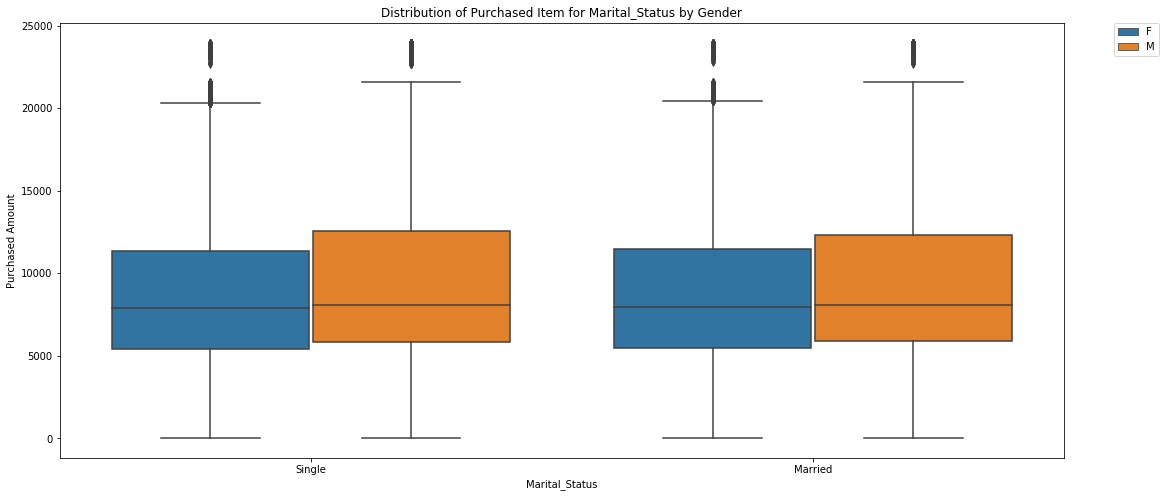

In [19]:
make_distribution('Marital_Status')

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df_copy = df.copy()

In [22]:
def label_encoding(parameter):
    df_copy[parameter] = le.fit_transform(df[[parameter]])

In [23]:
label_encoding('Gender')
label_encoding('Age')
label_encoding('Occupation')
label_encoding('City_Category')
label_encoding('Stay_In_Current_City_Years')
label_encoding('Marital_Status')

C:\Users\oneaf\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


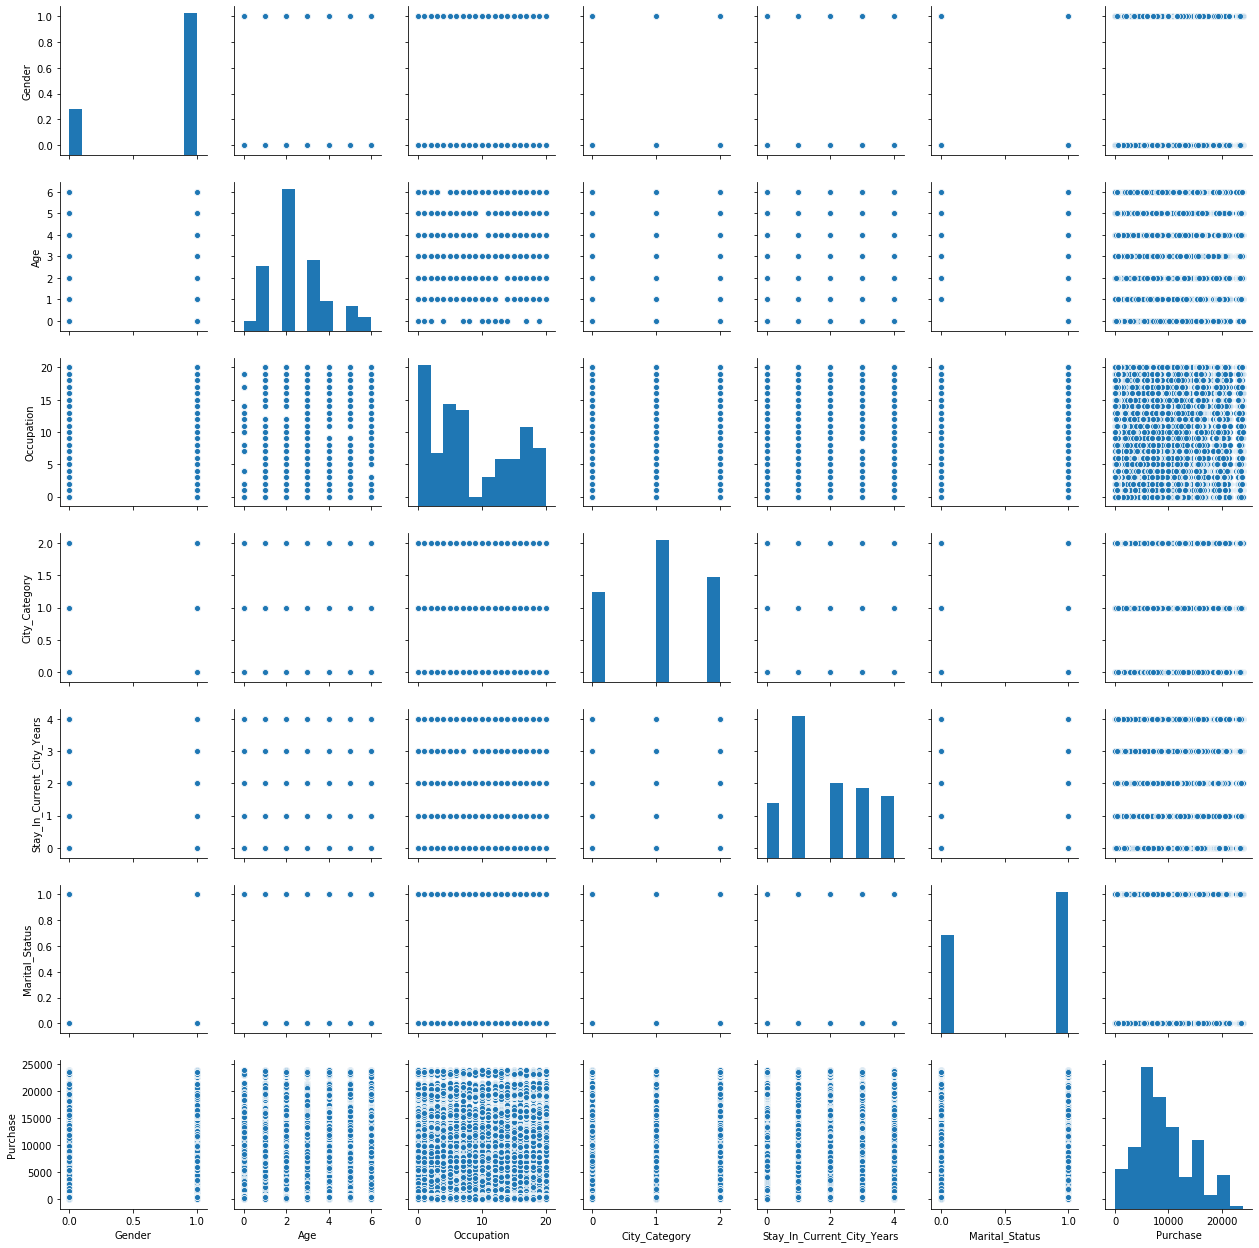

In [24]:
sns.pairplot(df_copy.drop(['User_ID','Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1))

In [25]:
def product_by_feature(feature, product):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.countplot(x=feature, hue=product, data=df)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

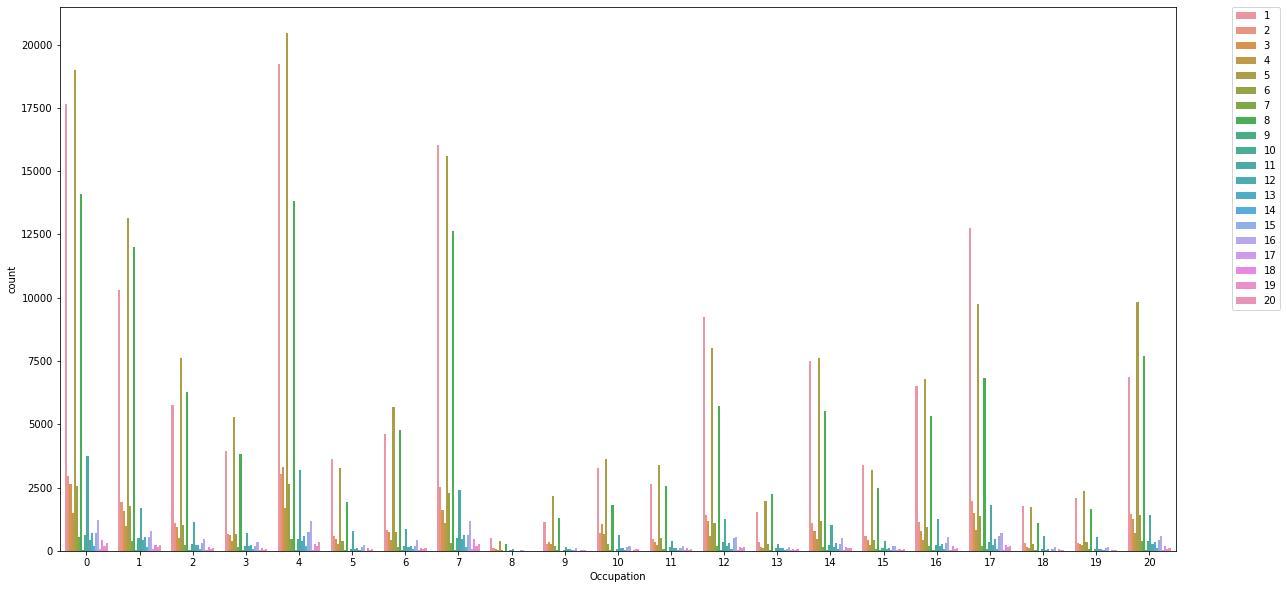

In [26]:
product_by_feature('Occupation', 'Product_Category_1')

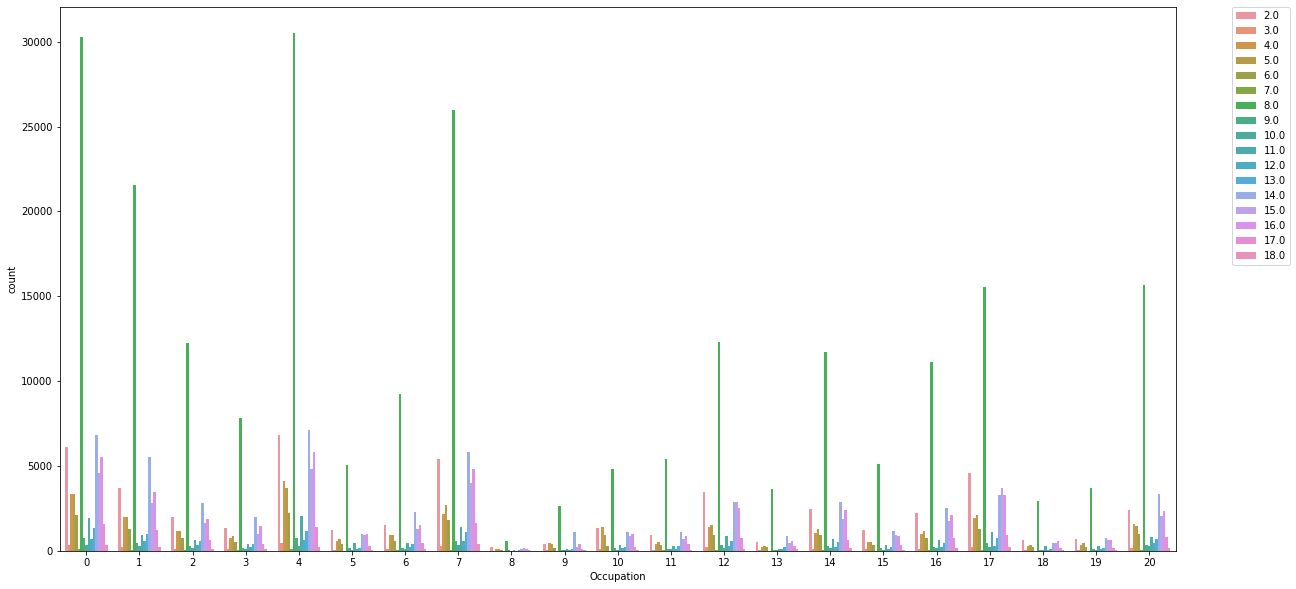

In [27]:
product_by_feature('Occupation', 'Product_Category_2')

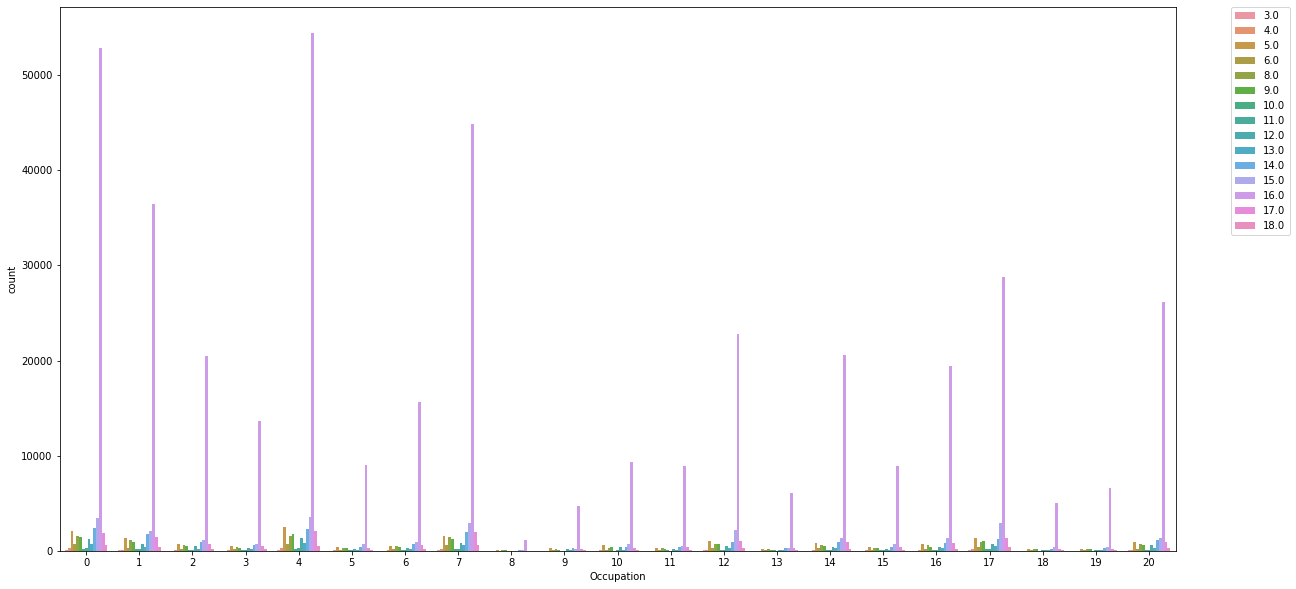

In [28]:
product_by_feature('Occupation', 'Product_Category_3')

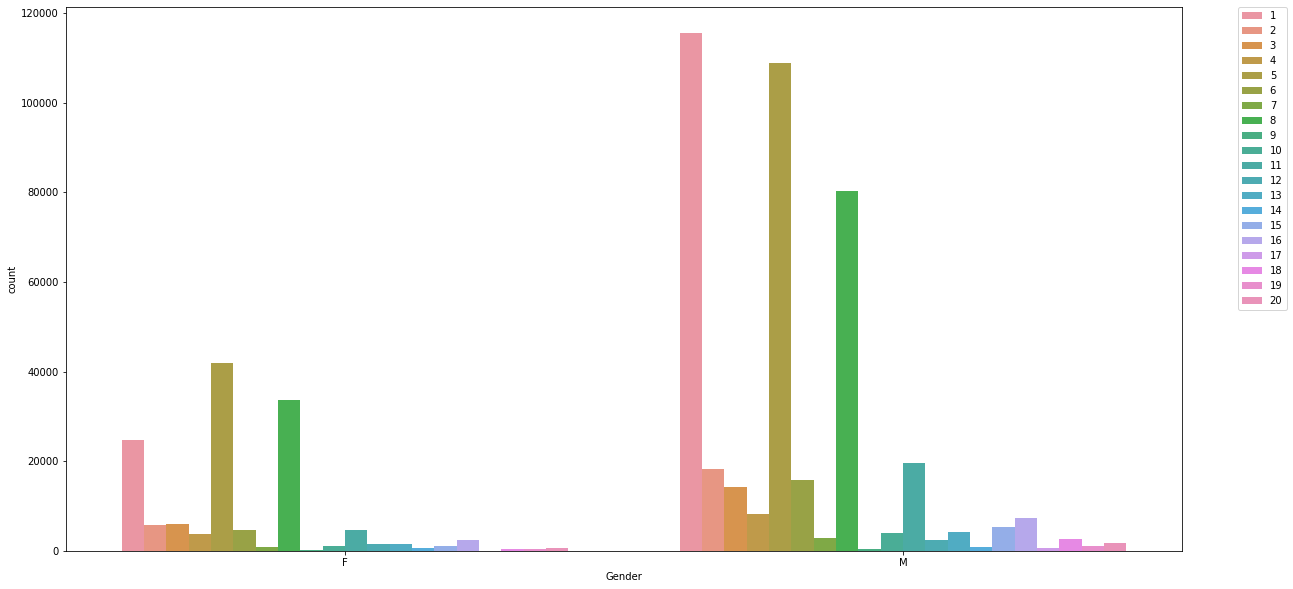

In [29]:
product_by_feature('Gender', 'Product_Category_1')

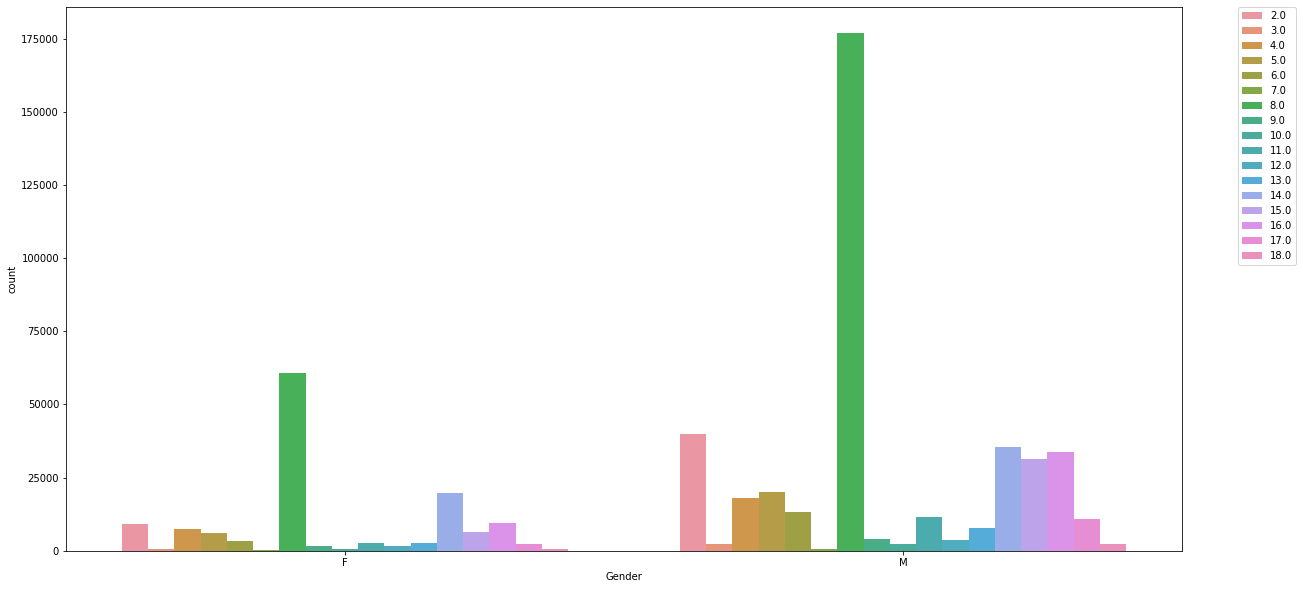

In [30]:
product_by_feature('Gender', 'Product_Category_2')

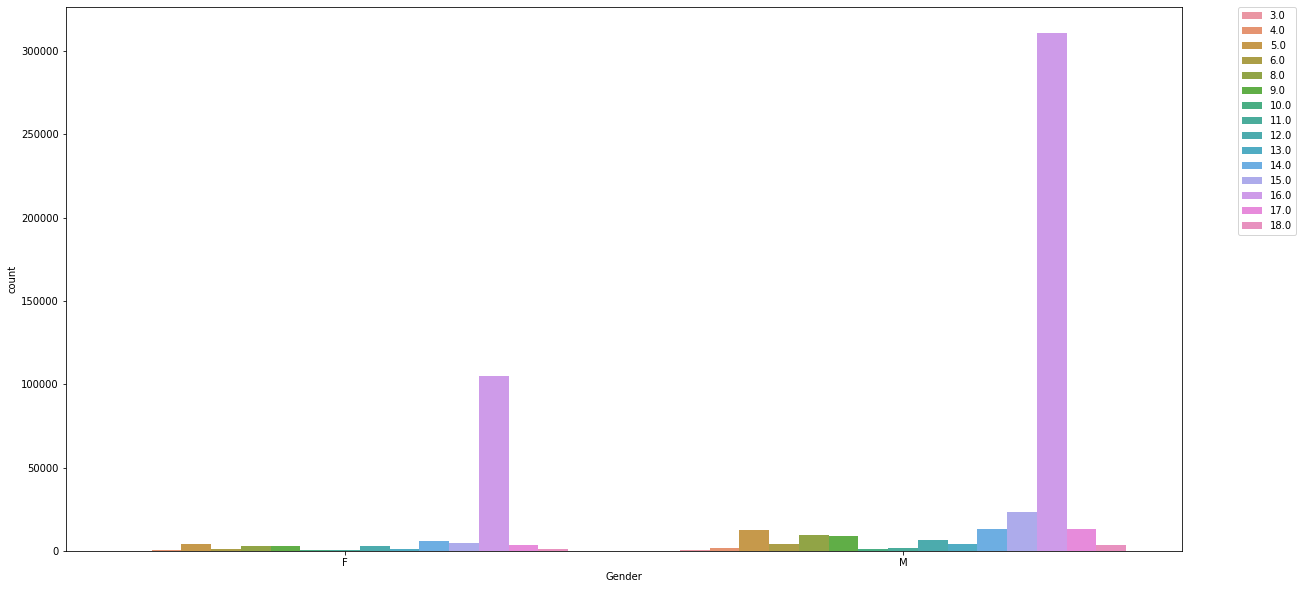

In [31]:
product_by_feature('Gender', 'Product_Category_3')

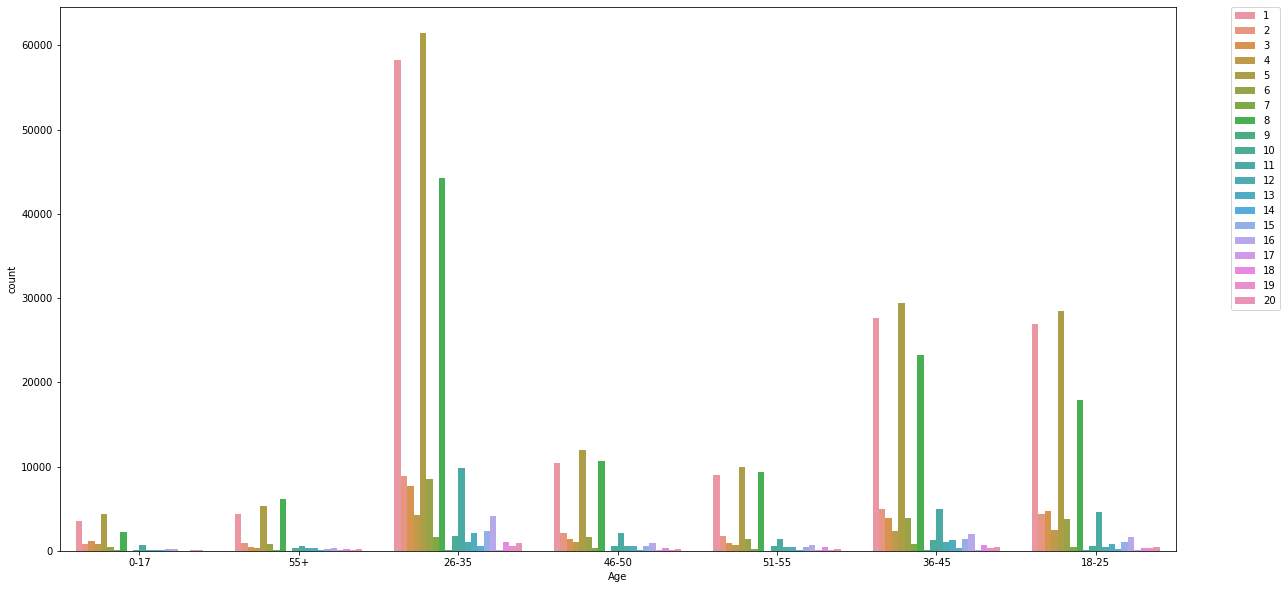

In [32]:
product_by_feature('Age', 'Product_Category_1')

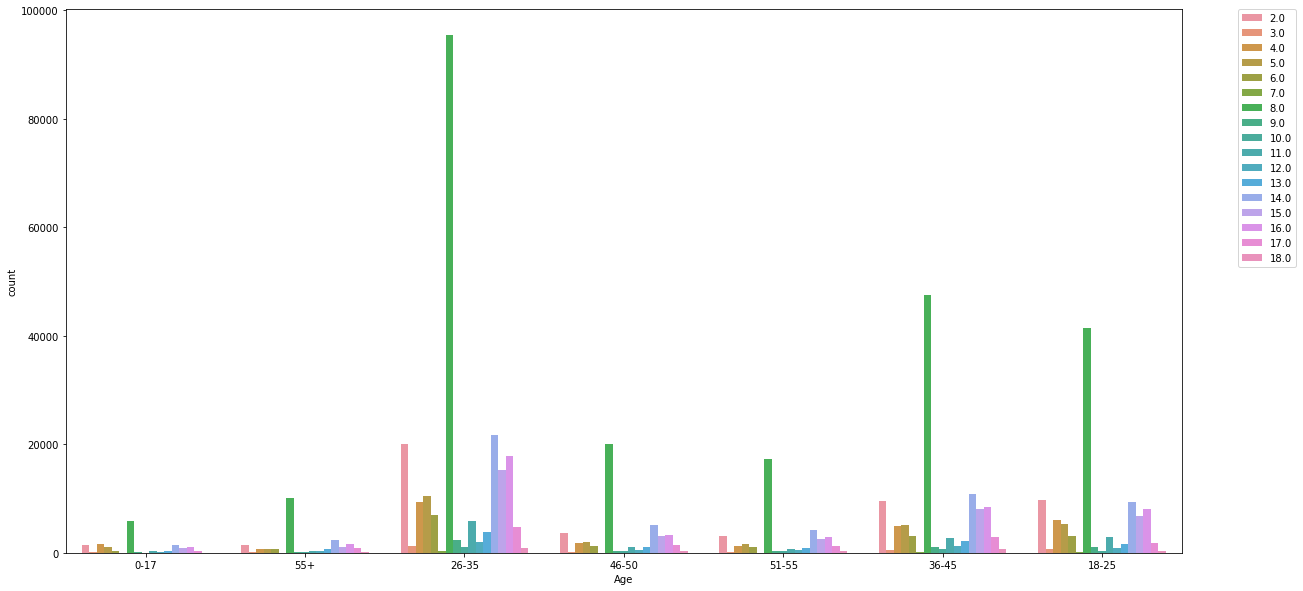

In [33]:
product_by_feature('Age', 'Product_Category_2')

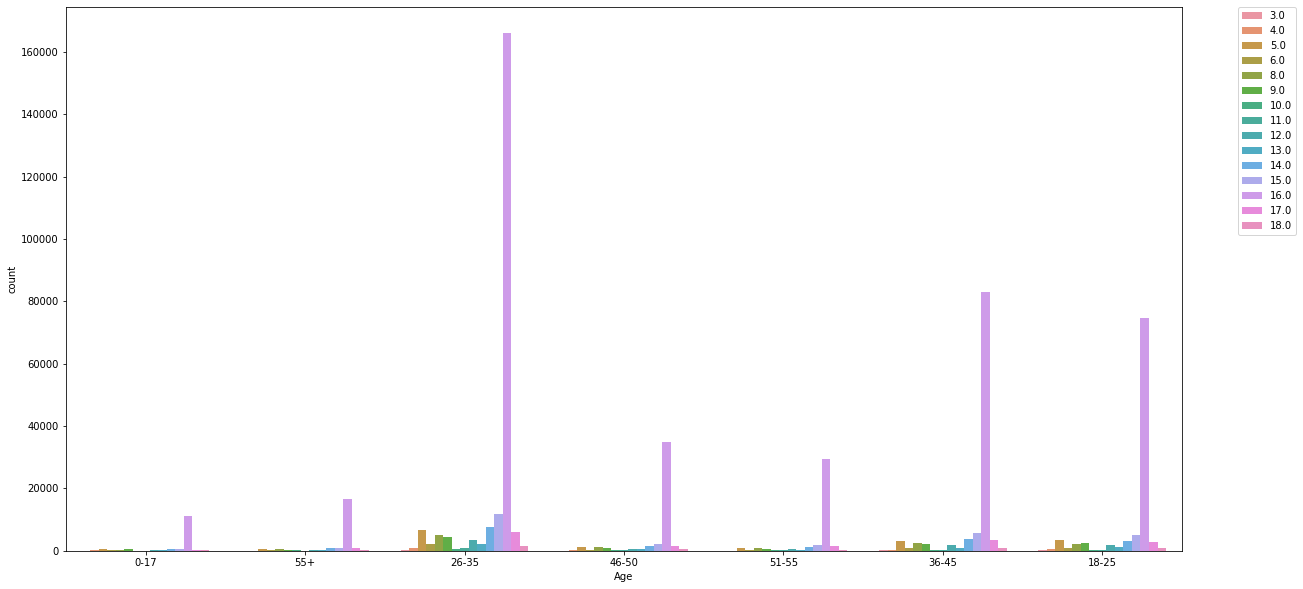

In [34]:
product_by_feature('Age', 'Product_Category_3')

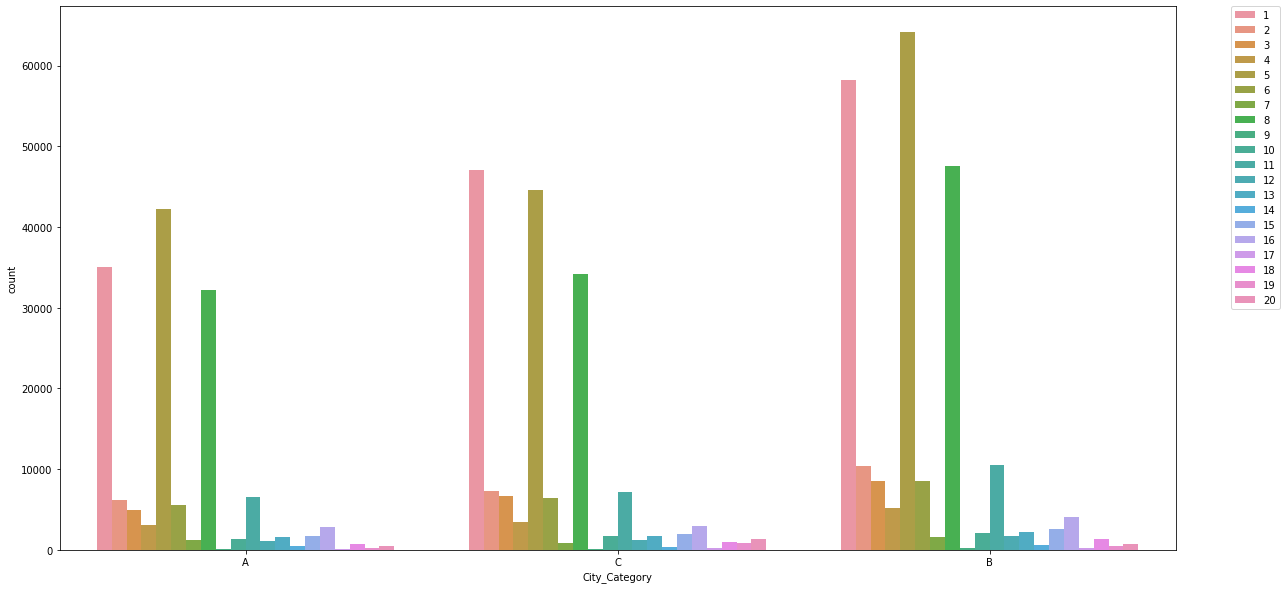

In [35]:
product_by_feature('City_Category', 'Product_Category_1')

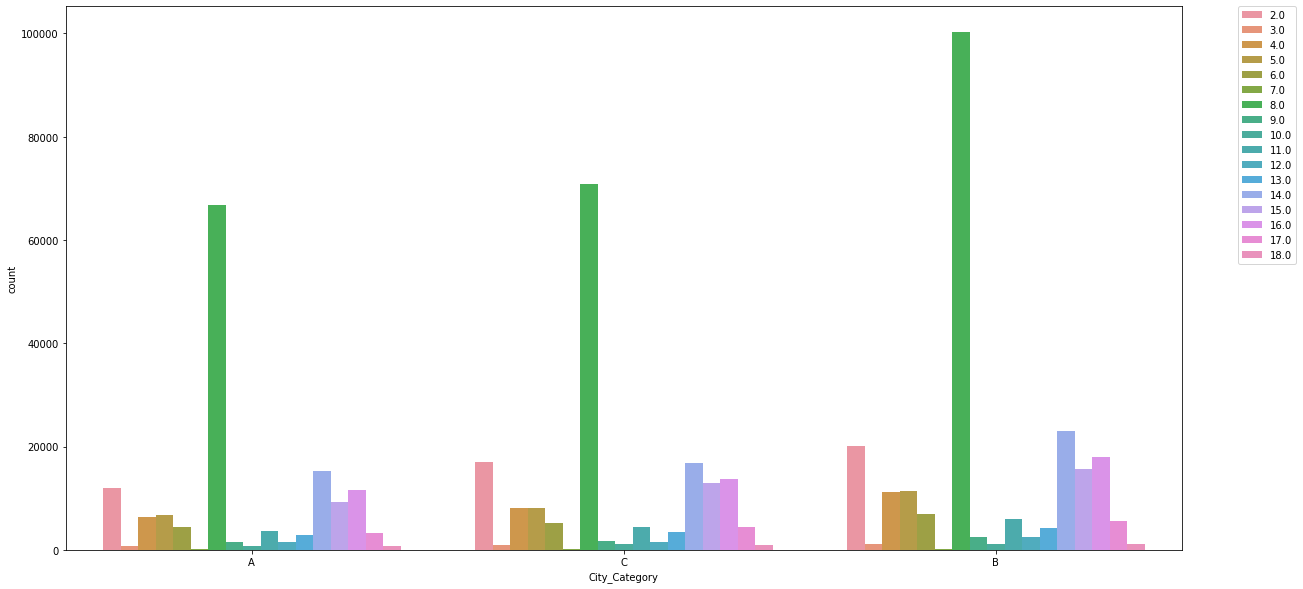

In [36]:
product_by_feature('City_Category', 'Product_Category_2')

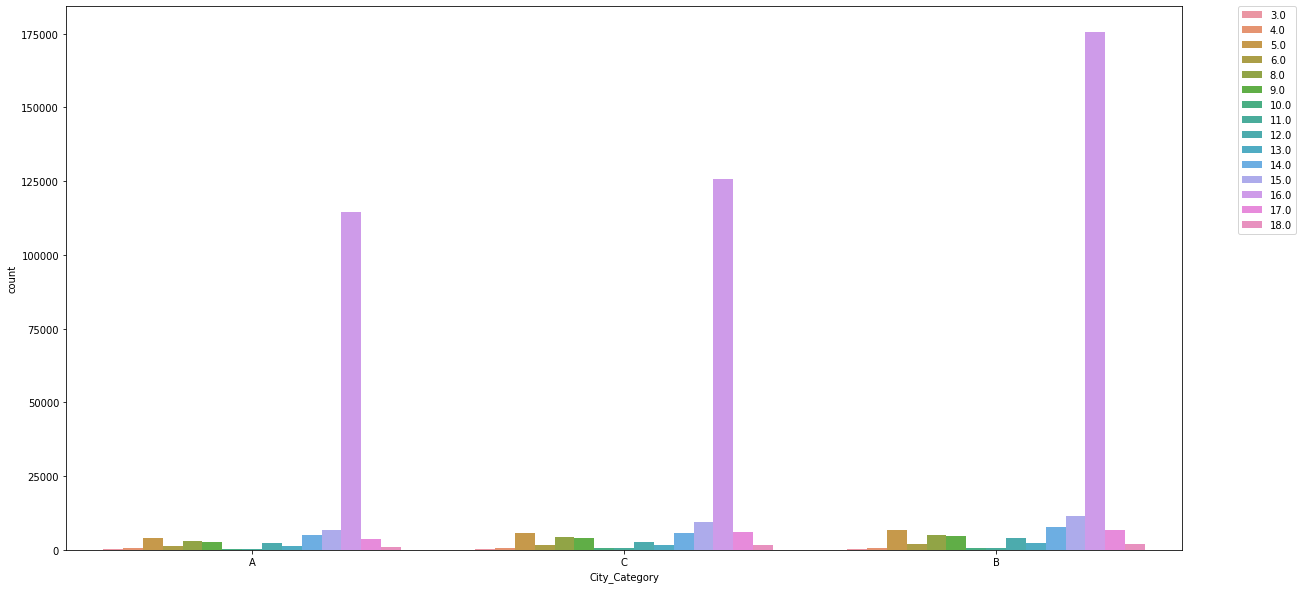

In [37]:
product_by_feature('City_Category', 'Product_Category_3')

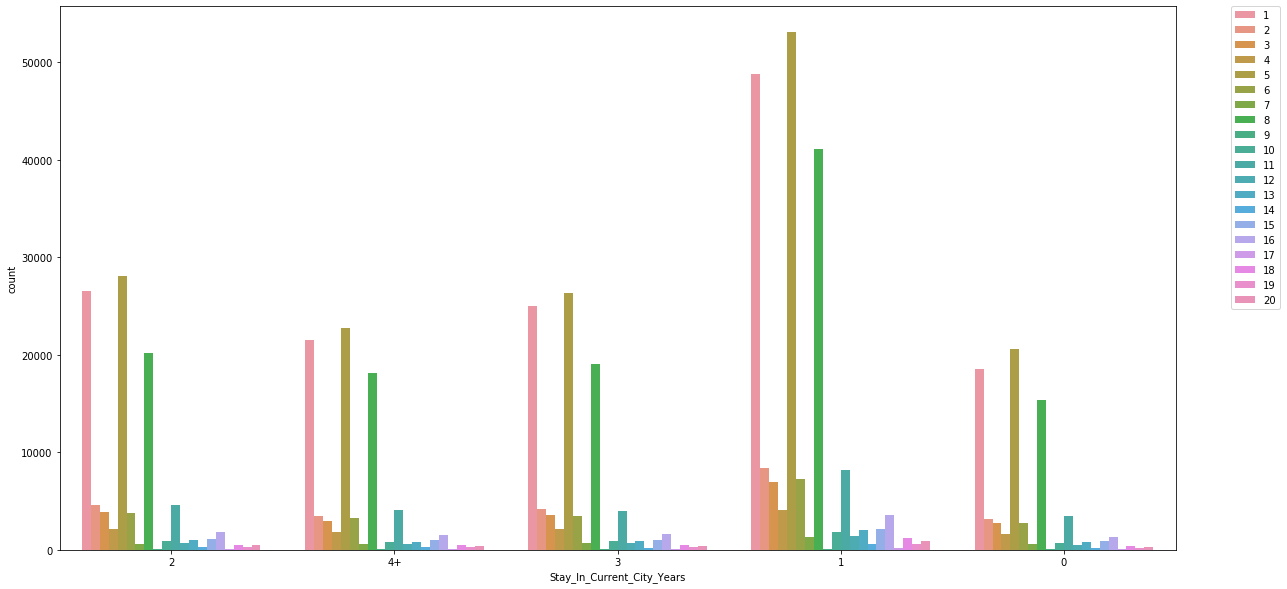

In [38]:
product_by_feature('Stay_In_Current_City_Years', 'Product_Category_1')

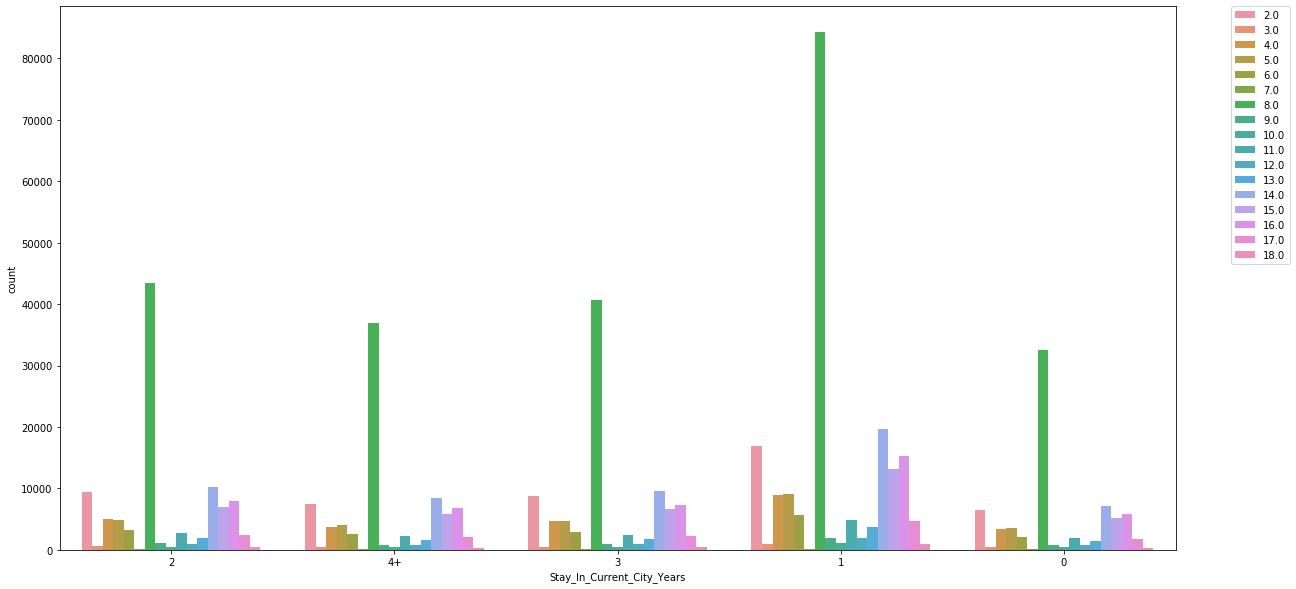

In [39]:
product_by_feature('Stay_In_Current_City_Years', 'Product_Category_2')

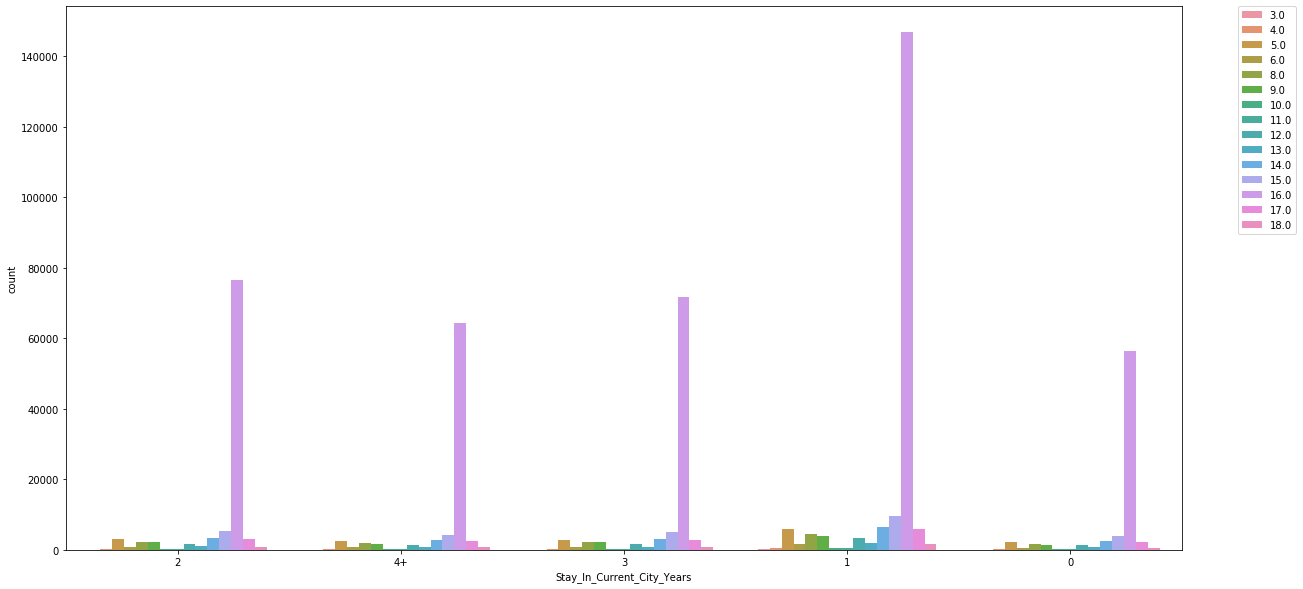

In [40]:
product_by_feature('Stay_In_Current_City_Years', 'Product_Category_3')

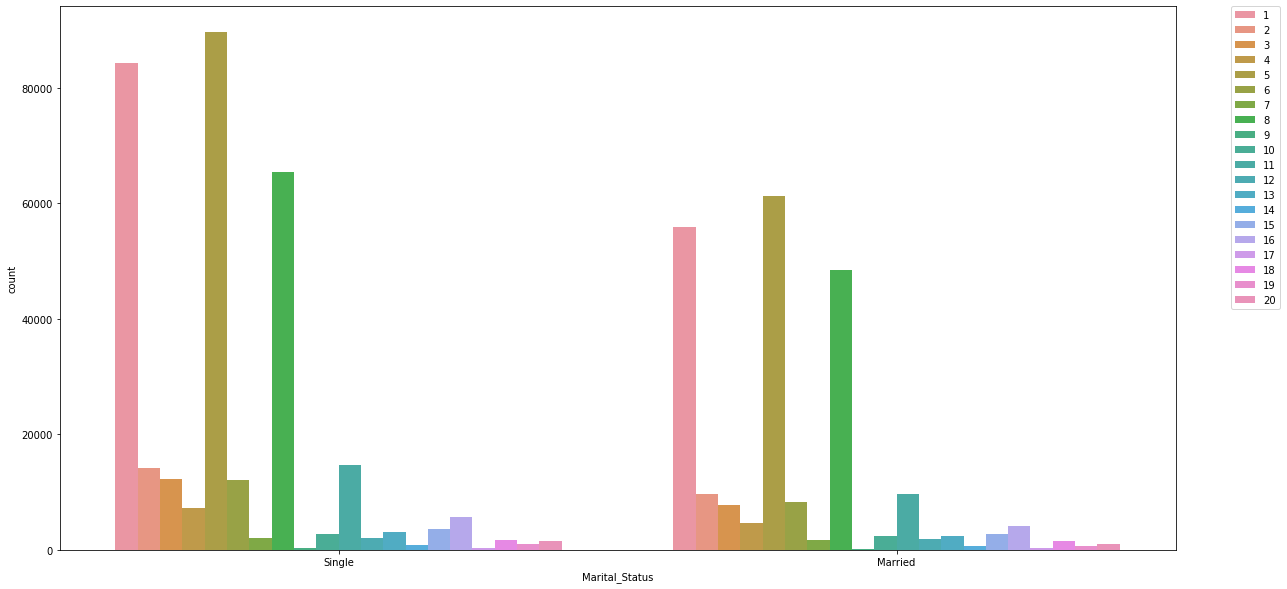

In [41]:
product_by_feature('Marital_Status', 'Product_Category_1')

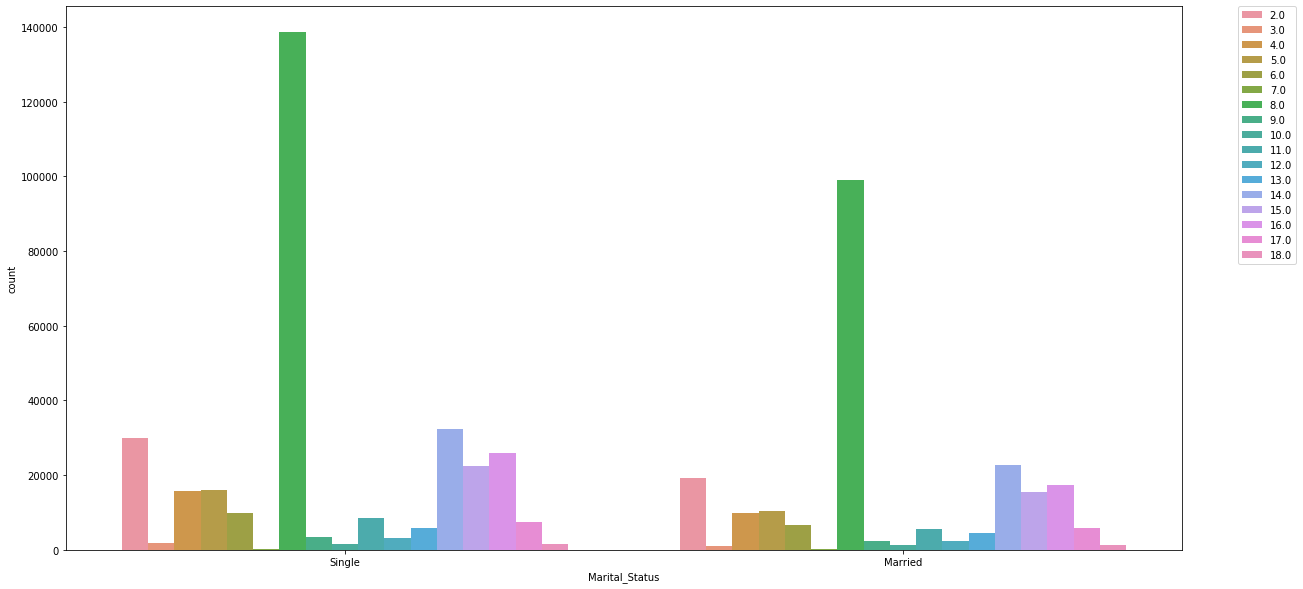

In [42]:
product_by_feature('Marital_Status', 'Product_Category_2')

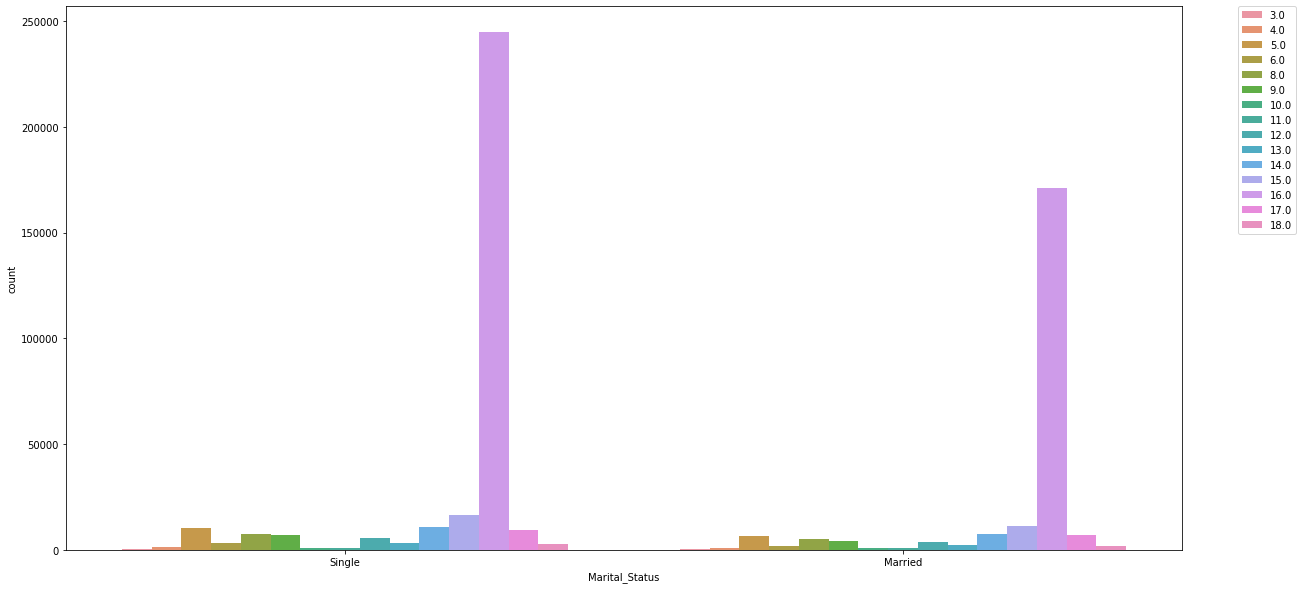

In [43]:
product_by_feature('Marital_Status', 'Product_Category_3')

In [52]:
print("Total Number of Unique Customer : ", len(df.User_ID.unique()))
print("Total Number of Unique Product : ", len(df.Product_ID.unique()))

Total Number of Unique Customer :  5891
Total Number of Unique Product :  3631


In [72]:
df.groupby(['Occupation', 'Gender']).count()

User_ID  Product_ID    Age  City_Category  \
Occupation Gender                                              
0          F         18112       18112  18112          18112   
           M         51526       51526  51526          51526   
1          F         17984       17984  17984          17984   
           M         29442       29442  29442          29442   
2          F          8629        8629   8629           8629   
           M         17959       17959  17959          17959   
3          F          7919        7919   7919           7919   
           M          9731        9731   9731           9731   
4          F         17836       17836  17836          17836   
           M         54472       54472  54472          54472   
5          F          2220        2220   2220           2220   
           M          9957        9957   9957           9957   
6          F          8160        8160   8160           8160   
           M         12195       12195  12195          12195   
7          F         10028       10028  10028          10028   
           M         49105       49105  49105          49105   
8          F           361         361    361            361   
           M          1185        1185   1185           1185   
9          F          5843        5843   5843           5843   
           M           448         448    448            448   
10         F          4003        4003   4003           4003   
           M          8927        8927   8927           8927   
11         F          1500        1500   1500           1500   
           M         10086       10086  10086          10086   
12         F          3469        3469   3469           3469   
           M         27710       27710  27710          27710   
13         F          1498        1498   1498           1498   
           M          6230        6230   6230           6230   
14         F          6763        6763   6763           6763   
           M         20546       20546  20546          20546   
15         F          2390        2390   2390           2390   
           M          9775        9775   9775           9775   
16         F          4107        4107   4107           4107   
           M         21264       21264  21264          21264   
17         F          3929        3929   3929           3929   
           M         36114       36114  36114          36114   
18         F           230         230    230            230   
           M          6392        6392   6392           6392   
19         F          2017        2017   2017           2017   
           M          6444        6444   6444           6444   
20         F          8811        8811   8811           8811   
           M         24751       24751  24751          24751   

                   Stay_In_Current_City_Years  Marital_Status  \
Occupation Gender                                               
0          F                            18112           18112   
           M                            51526           51526   
1          F                            17984           17984   
           M                            29442           29442   
2          F                             8629            8629   
           M                            17959           17959   
3          F                             7919            7919   
           M                             9731            9731   
4          F                            17836           17836   
           M                            54472           54472   
5          F                             2220            2220   
           M                             9957            9957   
6          F                             8160            8160   
           M                            12195           12195   
7          F                            10028           10028   
           M                            49105           49105   
8          F                    

In [73]:
df.groupby(['Occupation', 'Age']).count()

User_ID  Product_ID  Gender  City_Category  \
Occupation Age                                                 
0          0-17      2134        2134    2134           2134   
           18-25     9095        9095    9095           9095   
           26-35    34204       34204   34204          34204   
           36-45    13393       13393   13393          13393   
           46-50     4488        4488    4488           4488   
           51-55     4602        4602    4602           4602   
           55+       1722        1722    1722           1722   
1          0-17       387         387     387            387   
           18-25     3820        3820    3820           3820   
           26-35    19080       19080   19080          19080   
           36-45     9501        9501    9501           9501   
           46-50     7089        7089    7089           7089   
           51-55     4410        4410    4410           4410   
           55+       3139        3139    3139           3139   
2          0-17       144         144     144            144   
           18-25     4364        4364    4364           4364   
           26-35    12617       12617   12617          12617   
           36-45     5183        5183    5183           5183   
           46-50     2124        2124    2124           2124   
           51-55     1344        1344    1344           1344   
           55+        812         812     812            812   
3          18-25     1860        1860    1860           1860   
           26-35     8159        8159    8159           8159   
           36-45     4126        4126    4126           4126   
           46-50     1599        1599    1599           1599   
           51-55     1094        1094    1094           1094   
           55+        812         812     812            812   
4          0-17       113         113     113            113   
           18-25    48241       48241   48241          48241   
           26-35    21829       21829   21829          21829   
...                   ...         ...     ...            ...   
16         36-45     7572        7572    7572           7572   
           46-50     3032        3032    3032           3032   
           51-55     3918        3918    3918           3918   
           55+       1963        1963    1963           1963   
17         0-17        35          35      35             35   
           18-25     3944        3944    3944           3944   
           26-35    17064       17064   17064          17064   
           36-45    10252       10252   10252          10252   
           46-50     4662        4662    4662           4662   
           51-55     2528        2528    2528           2528   
           55+       1558        1558    1558           1558   
18         18-25     1085        1085    1085           1085   
           26-35     2243        2243    2243           2243   
           36-45     1527        1527    1527           1527   
           46-50     1124        1124    1124           1124   
           51-55      531         531     531            531   
           55+        112         112     112            112   
19         0-17       807         807     807            807   
           18-25     2500        2500    2500           2500   
           26-35     3468        3468    3468           3468   
           36-45     1008        1008    1008           1008   
           46-50      261         261     261            261   
           51-55      200         200     200            200   
           55+        217         217     217            217   
20         18-25     5445        5445    5445           5445   
           26-35    13994       13994   13994          13994   
           36-45     7508        7508    7508           7508   
           46-50     2699        2699    2699           2699   
           51-55     3115        3115    3115           3115   
           55+        801         801     801     

In [74]:
df.groupby(['Occupation', 'City_Category']).count()

User_ID  Product_ID  Gender    Age  \
Occupation City_Category                                       
0          A                18858       18858   18858  18858   
           B                29850       29850   29850  29850   
           C                20930       20930   20930  20930   
1          A                12809       12809   12809  12809   
           B                19756       19756   19756  19756   
           C                14861       14861   14861  14861   
2          A                 9232        9232    9232   9232   
           B                11366       11366   11366  11366   
           C                 5990        5990    5990   5990   
3          A                 5645        5645    5645   5645   
           B                 6905        6905    6905   6905   
           C                 5100        5100    5100   5100   
4          A                24205       24205   24205  24205   
           B                29854       29854   29854  29854   
           C                18249       18249   18249  18249   
5          A                 2383        2383    2383   2383   
           B                 6615        6615    6615   6615   
           C                 3179        3179    3179   3179   
6          A                 3755        3755    3755   3755   
           B                10953       10953   10953  10953   
           C                 5647        5647    5647   5647   
7          A                16216       16216   16216  16216   
           B                22986       22986   22986  22986   
           C                19931       19931   19931  19931   
8          A                  104         104     104    104   
           B                  829         829     829    829   
           C                  613         613     613    613   
9          A                  708         708     708    708   
           B                 3224        3224    3224   3224   
           C                 2359        2359    2359   2359   
...                           ...         ...     ...    ...   
11         A                 2470        2470    2470   2470   
           B                 5595        5595    5595   5595   
           C                 3521        3521    3521   3521   
12         A                 7080        7080    7080   7080   
           B                13184       13184   13184  13184   
           C                10915       10915   10915  10915   
13         A                  393         393     393    393   
           B                 2392        2392    2392   2392   
           C                 4943        4943    4943   4943   
14         A                 7745        7745    7745   7745   
           B                11256       11256   11256  11256   
           C                 8308        8308    8308   8308   
15         A                 3035        3035    3035   3035   
           B                 5262        5262    5262   5262   
           C                 3868        3868    3868   3868   
16         A                 6095        6095    6095   6095   
           B                10879       10879   10879  10879   
           C                 8397        8397    8397   8397   
17         A                 8177        8177    8177   8177   
           B                16111       16111   16111  16111   
           C                15755       15755   15755  15755   
18         A                 1605        1605    1605   1605   
           B                 2126        2126    2126   2126   
           C                 2891        2891    2891   2891   
19         A                 2236        2236    2236   2236   
           B                 3400        3400    3400   3400   
           C                 2825        2825    2825   2825   
20         A                12743       12743   12743  12743   
           B                14400       14400   14400  14400   
           C                 6419        6419    6419   64

In [75]:
df.groupby(['Occupation', 'Stay_In_Current_City_Years']).count()

User_ID  Product_ID  Gender    Age  \
Occupation Stay_In_Current_City_Years                                       
0          0                             10622       10622   10622  10622   
           1                             24690       24690   24690  24690   
           2                             12551       12551   12551  12551   
           3                             10776       10776   10776  10776   
           4+                            10999       10999   10999  10999   
1          0                              5996        5996    5996   5996   
           1                             16394       16394   16394  16394   
           2                              9537        9537    9537   9537   
           3                              8423        8423    8423   8423   
           4+                             7076        7076    7076   7076   
2          0                              4619        4619    4619   4619   
           1                              9776        9776    9776   9776   
           2                              4135        4135    4135   4135   
           3                              5324        5324    5324   5324   
           4+                             2734        2734    2734   2734   
3          0                              2120        2120    2120   2120   
           1                              5863        5863    5863   5863   
           2                              3833        3833    3833   3833   
           3                              3262        3262    3262   3262   
           4+                             2572        2572    2572   2572   
4          0                             11756       11756   11756  11756   
           1                             21711       21711   21711  21711   
           2                             15721       15721   15721  15721   
           3                             11889       11889   11889  11889   
           4+                            11231       11231   11231  11231   
5          0                              2098        2098    2098   2098   
           1                              5694        5694    5694   5694   
           2                              1744        1744    1744   1744   
           3                              1184        1184    1184   1184   
           4+                             1457        1457    1457   1457   
...                                        ...         ...     ...    ...   
15         0                              1141        1141    1141   1141   
           1                              4627        4627    4627   4627   
           2                              2293        2293    2293   2293   
           3                              2063        2063    2063   2063   
           4+                             2041        2041    2041   2041   
16         0                              3823        3823    3823   3823   
           1                              9158        9158    9158   9158   
           2                              4966        4966    4966   4966   
           3                              4290        4290    4290   4290   
           4+                             3134        3134    3134   3134   
17         0                              4197        4197    4197   4197   
           1                             12129       12129   12129  12129   
           2                              7770        7770    7770   7770   
           3                              9020        9020    9020   9020   
           4+                             6927        6927    6927   6927   
18         0                              1635        1635    1635   1635   
           1                              2123        2123    2123   2123   
           2                               934         934     934    934   
           3                               469         469     469    469   
           4+                      

In [77]:
df.groupby(['Occupation', 'Marital_Status']).count()

User_ID  Product_ID  Gender    Age  City_Category  \
Occupation Marital_Status                                                      
0          Married           29149       29149   29149  29149          29149   
           Single            40489       40489   40489  40489          40489   
1          Married           22702       22702   22702  22702          22702   
           Single            24724       24724   24724  24724          24724   
2          Married           12282       12282   12282  12282          12282   
           Single            14306       14306   14306  14306          14306   
3          Married            7286        7286    7286   7286           7286   
           Single            10364       10364   10364  10364          10364   
4          Married           19532       19532   19532  19532          19532   
           Single            52776       52776   52776  52776          52776   
5          Married            4569        4569    4569   4569           4569   
           Single             7608        7608    7608   7608           7608   
6          Married            9165        9165    9165   9165           9165   
           Single            11190       11190   11190  11190          11190   
7          Married           25730       25730   25730  25730          25730   
           Single            33403       33403   33403  33403          33403   
8          Married             855         855     855    855            855   
           Single              691         691     691    691            691   
9          Married            3253        3253    3253   3253           3253   
           Single             3038        3038    3038   3038           3038   
10         Married             753         753     753    753            753   
           Single            12177       12177   12177  12177          12177   
11         Married            4446        4446    4446   4446           4446   
           Single             7140        7140    7140   7140           7140   
12         Married           14499       14499   14499  14499          14499   
           Single            16680       16680   16680  16680          16680   
13         Married            4098        4098    4098   4098           4098   
           Single             3630        3630    3630   3630           3630   
14         Married           11247       11247   11247  11247          11247   
           Single            16062       16062   16062  16062          16062   
15         Married            5515        5515    5515   5515           5515   
           Single             6650        6650    6650   6650           6650   
16         Married           12003       12003   12003  12003          12003   
           Single            13368       13368   13368  13368          13368   
17         Married           17311       17311   17311  17311          17311   
           Single            22732       22732   22732  22732          22732   
18         Married            3007        3007    3007   3007           3007   
           Single             3615        3615    3615   3615           3615   
19         Married            1535        1535    1535   1535           1535   
           Single             6926        6926    6926   6926           6926   
20         Married           16400       16400   16400  16400          16400   
           Single            17162       17162   17162  17162          17162   

                           Stay_In_Current_City_Years  Product_Category_1  \
Occupation Marital_Status                                                   
0          Married                              29149               29149   
           Single                               40489               40489   
1          Married                              22702               22702   
           Single                               24724               24724   
2          Married                          

In [83]:
print('Total number of unique Product belongs to Product_Category_1 is : ', len(df.Product_Category_1.unique()))
print('Total number of unique Product belongs to Product_Category_2 is : ', len(df.Product_Category_2.unique()))
print('Total number of unique Product belongs to Product_Category_3 is : ', len(df.Product_Category_3.unique()))

Total number of unique Product belongs to Product_Category_1 is :  20
Total number of unique Product belongs to Product_Category_2 is :  17
Total number of unique Product belongs to Product_Category_3 is :  15
